# Tarea 10

## Para entregarse el miércoles 11 de noviembre de 2015

[1] Resuelve numéricamente (usando el método de relajación) el problema de encontrar el potencial y el campo eléctrico entre, y alrededor de, dos placas paralelas en dos dimensiones (notebook 21). Puedes suponer condiciones de Dirichlet iguales a $0$ en las fronteras de la caja cuadrada.

In [13]:
NL = 100;
NT = 500
L = 1;

dL = L/NL;
mesh = zeros(NL, NL, NT);

ρ = zeros(NL, NL)
ρ[Int(NL/10):Int(9*NL/10),Int(NL/2)] = 1
ρ[Int(NL/10):Int(9*NL/10),Int(NL/2)+Int(NL/10)] = -1

for t in 1:(NT-1)
    for x in 2:(NL-1), y in 2:(NL-1)
        xp = x-1
        xn = x+1
        yp = y-1
        yn = y+1
        
        if xp == 0
            uxp = 0
            uxn = mesh[xn, y, t]
        elseif xn == NL
            uxn = 0
            uxp = mesh[xp, y, t]
        else
            uxp = mesh[xp, y, t]
            uxn = mesh[xn, y, t]
        end
        
        if yp == 0
            uyp = 0
            uyn = mesh[x, yn, t]
        elseif yn == NL
            uyn = 0
            uyp = mesh[x, yp, t]
        else
            uyp = mesh[x, yp, t]
            uyn = mesh[x, yn, t]
        end
        
        mesh[x, y, t+1] = 1/4 * (uyn + uyp + uxp + uxn + dL^2 * ρ[x,y])
    end
end

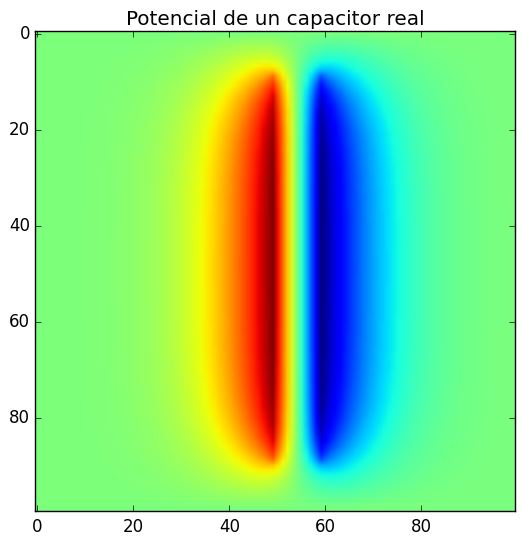

PyObject <matplotlib.text.Text object at 0x7f5a7b03a908>

In [14]:
using PyPlot;

imshow(mesh[:,:,end])
title("Potencial de un capacitor real")

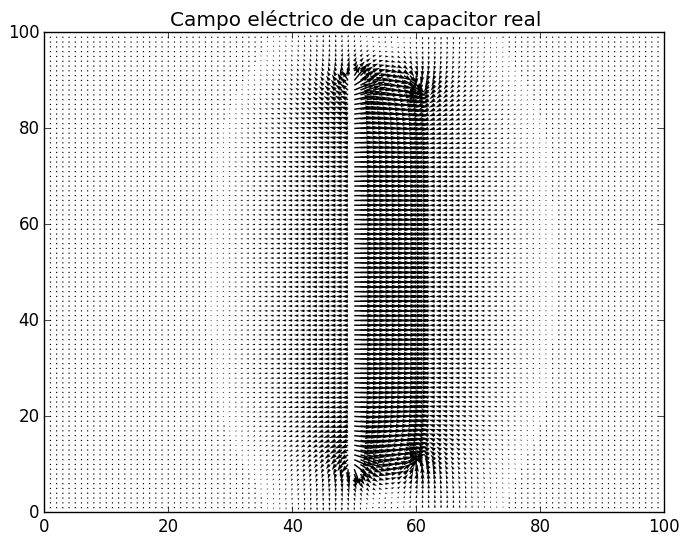

PyObject <matplotlib.text.Text object at 0x7f5a789053c8>

In [15]:
### Ahora encontramos el campo al tomar el gradiente (negativo) del potencial
X = Any[]
Y = Any[]
U = Any[]
V = Any[]

# Tomamos el gradiente
for x in 1:(NL-1), y in 1:(NL-1)
    # Lo de abajo no es un error. Es para que la gráfica esté de acuerdo con la anterior
    push!(X, y)
    push!(Y, x)
    
    u = mesh[x+1, y, end] - mesh[x, y, end]
    v = mesh[x, y+1, end] - mesh[x, y, end]
    
    # El signo menos es por definición del potencial
    push!(U, -v)
    push!(V, -u)
end

# Ploteamos
quiver(X, Y, U, V)
title("Campo eléctrico de un capacitor real")

[2] Encuentra numéricamente (usando las herramientas de Julia) los eigenvalores de energía y las eigenfunciones de una partícula libre cuántica en una caja cuadrada, y compáralas con la solución analítica (notebook 22).

**3. Modos normales**

Considera un sistema compuesto por cuatro carritos de masa $m$, acoplados con resortes sobre una pista recta. El carrito en cada extremo está acoplado mediante un resorte a una pared. Todos los resortes obedecen la ley de Hooke con la misma constante $k$.

- Deduce las ecuaciones de movimiento a partir de la segunda ley de Newton y escríbelas en forma matricial. 

**Solución:**

Si tomamos $\{x_1, x_2, x_3, x_4\}$ como *desplazamientos desde el equilibrio* para cada carrito, y suponemos que las longitudes de los resortes son iguales, entonces la ecuación matricial para la fuerza es

$$
\begin{pmatrix}
x_1'' \\
x_2'' \\
x_3'' \\
x_4''
\end{pmatrix}=
%
\frac{k}{m} \begin{pmatrix}
-2 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2
\end{pmatrix}
%
\begin{pmatrix}
x_1 \\
x_2 \\
x_3 \\
x_4
\end{pmatrix}
$$

- Para resolver el sistema de ecuaciones proponemos la solución

$$
\vec{x}(t) = \mathrm{Re}(\vec{z}(t)), \quad \vec{z}(t) = \vec{a}e^{i\omega t},
$$
donde $\vec{a}$ es un vector complejo que tiene la información de la amplitud y la fase de las oscilaciones, que dependen de las condiciones iniciales. 

Las **frecuencias normales** del sistema son las raíces positivas de la ecuación característica de la matriz $\mathbb{K} - \omega^2\mathbb{M}$ y los modos normales son los vectores que satisfacen la ecuación de autovalores $(\mathbb{K} - \omega^2\mathbb{M})\vec{a} = 0$. El movimiento del sistema está dado por la superposición de todos los modos normales.


- Calcula las frecuencias normales y los modos normales del sistema.

In [16]:
### Creamos la matriz (suponiendo por simplicidad k/m = 1)
K = [-2 1 0 0; 1 -2 1 0; 0 1 -2 1; 0 0 1 -2]

# Y encontramos sus eigenvalores y eigenvectores (modos y frecuencias normales)
ei = eig(K)

([-3.6180339887498896,-2.618033988749894,-1.3819660112501035,-0.38196601125010504],
4x4 Array{Float64,2}:
 -0.371748   0.601501  -0.601501  0.371748
  0.601501  -0.371748  -0.371748  0.601501
 -0.601501  -0.371748   0.371748  0.601501
  0.371748   0.601501   0.601501  0.371748)

- Grafica, para cada modo normal, la posición de los carritos como función del tiempo. Describe cada modo normal en términos del movimiento de cada carrito. [Puedes utilizar `subplot`.]

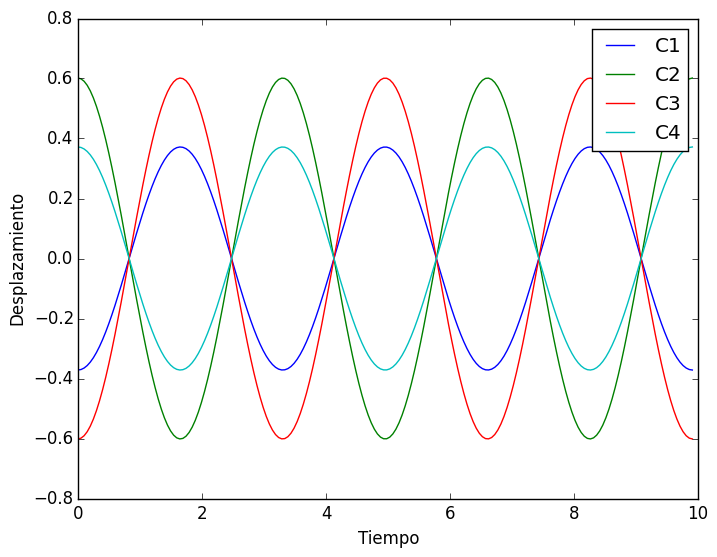

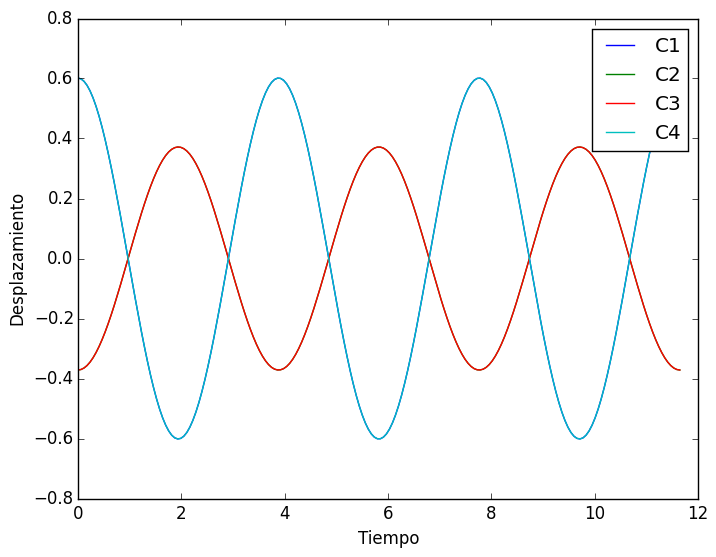

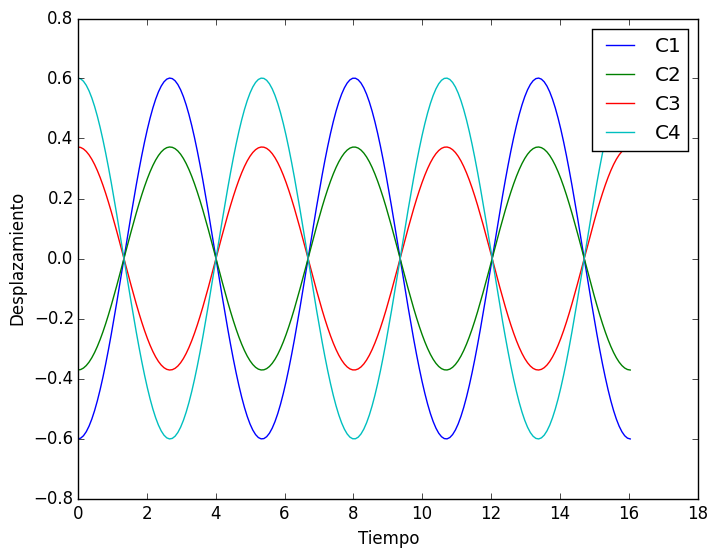

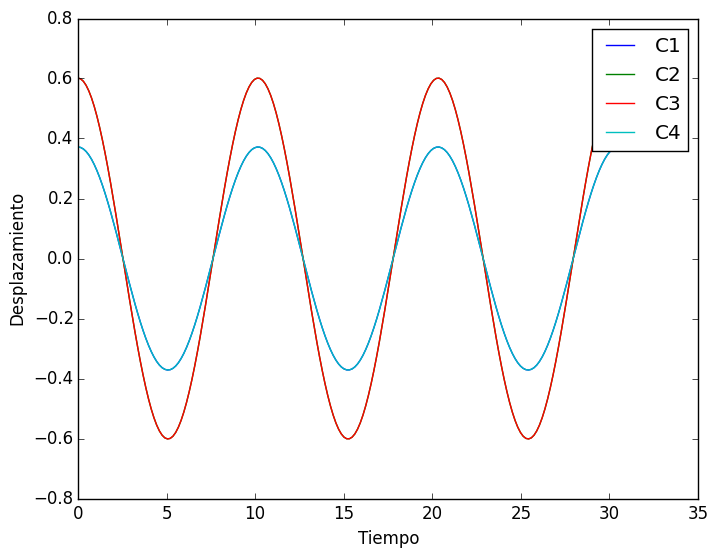

PyPlot.Figure(PyObject <matplotlib.figure.Figure object at 0x7f5a788378d0>)

In [17]:
# Y graficamos
NL=200
using PyPlot;
for i in 1:size(ei[1])[1]
    ω = sqrt(-ei[1][i])
    a = ei[2][:,i]
    tmax = 3*2π/ω
    trange = linspace(0,tmax, NL)
    
    y = [real(transpose(a)*exp(im*ω*t)) for t in trange]

    for j in 1:size(a)[1]
        plot(trange, [y[l][j] for l in 1:size(y)[1]], label="C$j")
    end
    legend()
    xlabel("Tiempo")
    ylabel("Desplazamiento")
    figure()
end

**Discusión:**

El movimiento se parece el caso de un sistema de dos carritos nada más. I.e. hay modos en donde todos los carritos se mueven como si fueran uno solo, hay modos compresionales y hay modos antisimétricos. Todo esto se ve mejor más abajo, en los videos

- Grafica el movimiento de cada carrito. En esta representación es difícil ver cómo se mueven los carritos. Haz una animación. Para dibujar un punto puedes usar `plot([x1],[y1],"ks")`. Si en tu computadora no se ven los `mp4` en el cuaderno, usa `GIF`. No batalles con eso.

In [18]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim  

# Función de animar ligeramente modificada
function anima(edos, nombre::ASCIIString)
    fig = figure(figsize=(5,5))
    #cuadros = [[imshow(edos[i], interpolation="none")] for i=1:length(edos)]
    xlen = size(edos[1,:])[1]
    cuadros = [[plot(edos[i,:], zeros(xlen), "ks")] for i=1:size(edos)[1]]
    
    animacion = anim.ArtistAnimation(fig, cuadros, interval=50, blit=true) 
    animacion[:save](nombre*".mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])
end

function muestra_animacion(nombre::ASCIIString)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",base64(open(readbytes,nombre*".mp4")),"""" type="video/mp4"></video>"""))
end

muestra_animacion (generic function with 1 method)

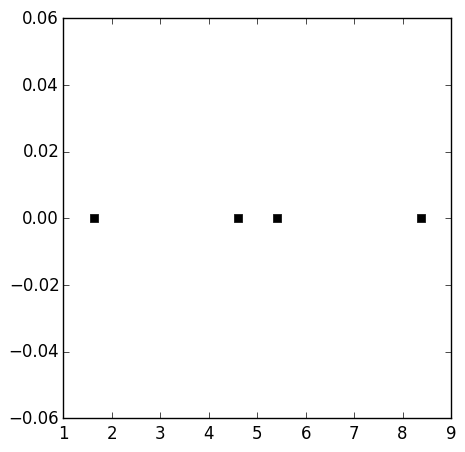

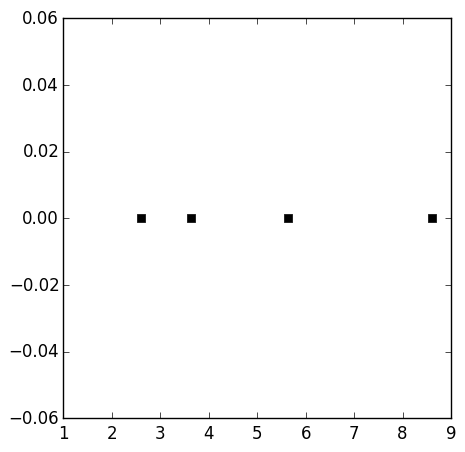

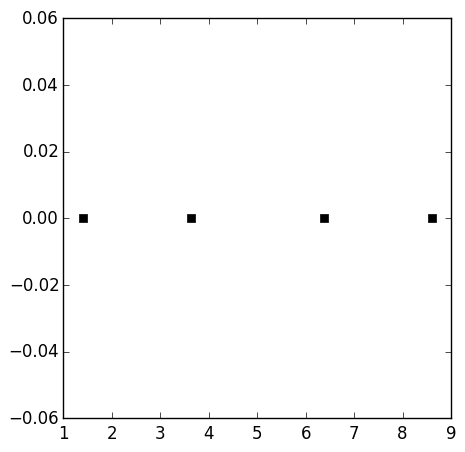

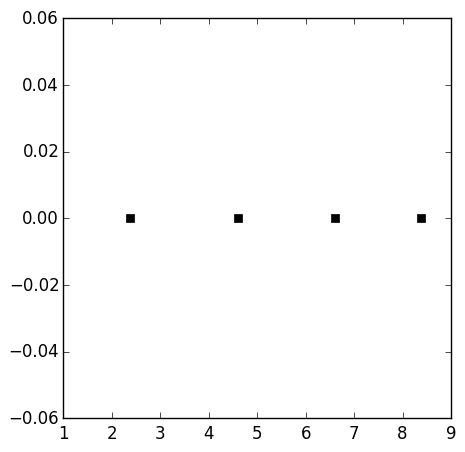

In [19]:
NL = 100
### Generamos el movimiento en el primer modo

for i in 1:size(ei[1])[1]
    ω = sqrt(-ei[1][i])
    a = ei[2][:,i]
    tmax = 2*2π/ω
    trange = linspace(0,tmax, NL)
    
    y = [real(transpose(a)*exp(im*ω*t)) for t in trange]
    
    # Generamos un desplazamiento a las masas
    for i2 in 1:NL, j in 1:size(a)[1]
        y[i2][j] += 2j
    end

    # Generamos datos a animar
    data = zeros(NL, size(a)[1])
    
    for i3 in 1:NL
        data[i3,:] = y[i3]
    end
    
    # Y creamos las animaciones
    fname = "four_$i"
    
    anima(data, fname)
end

In [20]:
# Y mostramos las animaciones un tiempo después (se generan bien, pero no se muestran bien de otra manera)
for i in 1:size(ei[1])[1]
    fname = "four_$i"
    muestra_animacion(fname)
end

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAJ75tZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjU3OSA3M2FlMmQxIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAQs2WIhAA///73aJ8Cm1pDeoDklcUl20+B/6tncHyP6QMAAAMAAAMAJAL8x7+hB0M0IAAAU28/rgYo6HMAbu+EzW+jEGsHxLgbfcVefZuvpX3haqnO3ZZlAbFv45vQYqUA2g8Oa/gOT2ucumRXKu/Ml+h7RNwWtlsdM+4WB48i+ff3PmiGOwLRYDW2KF2Nutz2mNg3NsT67Sjx7AugwMVD0xn0GmNz3DV8X8zY1wXw0hcfkfctqJPkmuMSDmIJ1L9du6UadD7Jy072+s+jKqt2XKpoRNXRq5gKAASLeqECUMT2pMDZ11bpRVxmUFVm8Hfhe10ZVGMRI9nTzZ4Ky/idNvc4KiP0LC9Ye9qSfWZtTmbgoZ/G3yWgjiA5oOP57Lm9AC5qR1Vvjd5TiKfmpHatmODNqUktV/hiUo/b+7UG7o6sK1q8gpf4M2auHo38NUyx+MjKiSzgx04YxeVwG5KmU/qEla2me5kOXfTWyqaI3EHnDwIQdpSA+806evUjVL1bu9k/lGa41X2CEf/2TM05mSgFg+pZq5kebNMqjeVaDDbsNF0AN0fN9azYWdZSM9L96NxDadBcuwPowGyKEWZf+Yc0Adbzt0X6D3NXAClNLtruNBPygwlyl0EeCrw/iQmn+8tQ29V0gJ9phUgW1+b3gb9f5fDy+NzquiXAldiq+czSLZH4AHhokbvfLzGizZFSv/a3Sbp/JtlKNcASx3DUz+x65X/QiXaPQS/3TZ1hUcOtt/h3j2+6jPNhRx9Kucf8fxOCrsegzp7bo/jNFeJUK0KBwcDzzYdxHRzhJAoonNuqjwJEJAarHLTDjAev/jITGlgIP3YRKxta5G4doH5n6Cv14ldb4MBynhwAAbV+6/kiDj0d7my8coU8vXihkee1VEvc9JzZdzpRZtwXOUf6zAUAEWjXUQjZHiVAsMFZ+qBatIiVm93eGkcbjjERLjibBJpf+o7I+OU+GebT+3e4Uw7G3knsEn47wnY85QpSgAKu1bE24ODKEsBeW7a8O+EwOTNnrD7nh2jgAUWKogZMng1CjhCGGTKiihcjy6jDHY2W5DGr5U7s/pxrbR4F0o3j+bGz0HDe3kYsvUcEGyV6Trab/ENxI7FMyCKhNBlA3VyqXNlrettHP0lwQbjoml0m4AIMO8yxAZ6k5LGLy1/RUg97+kOzS5WtDJStFvHEha8hedc7BLcbgrny8G6uv/XdCX7yG2OI5J9aGbr3VmoqJAJ8Q8dtjPKwisBbYrmhJJgeIngAgXh/qX4iqBbFnc7okHblUdHa0ezKNyYo2KzVhkVDXRsjnv3/keq14y6E8lkwQEyiX3l/QvcmPCkWkYEgVVBm4B481ourS29PnyfBfGACQyAnATx7fhfxsTE53eifBIgJkf//fIv+PpRqGvQnQUuoZIv/4GzrPN7Cy2InRrCP6l1v7XodK7wwYDsIp3wMF1GUi5dKn/eoAavQ7CG2LBp6bep2OX2ex7TLsEnCLvBOXAnBT59aJi+al8oaCX2fNA1Y1Lw3z06lj/5cvjxCNyRg929CtGXmWAxtxQjEE1LbCwz3yMRfWDFdSCMJ7l3CImmbaQSECrVpVtaAyXjEi4F0t9KBpYCkfeiZNdGlcvHipr+rwyGATgo1qDmy/oTYB8271tNXBsPOvf8Fd4Rvx6d+pa04rsMCxZWYa981x4A1SVB9ouU0EqvcFzJyA1jThZXK1bC841M/OVKOW1rx7nUmR/+uIejg3T87lx2VTn9iolnH+TDeszUQndyh9F5BPOM0miGjGfjrsdgEkKcR+xSgfFQIW7BGC2C9PmZfgACKQ67+mS6g6Oeg+mRLxpjI+W2KvjHJdZpFnbWQB7azzRh5844WLg2DGxHgAP4KDGXBnKLf+dm3igaIenvktYGrM8d84q2tcF5havD+jV/GogrBl8ebUojnc55JmE0oizUeAuWZ6eBTISRgfSZPUz7HU4810kSUJQVaWB9p8p5T9nMGKKxugknmqhE8Mgaqc3dGmVOq1QZFqtE4N1ixBunTZjG2+TQ3OERTsS0YOEaS9cwJ5gMoJZ5cNQIxbSteeXEKhGLoBKrBOe/D6hQujGezPywyz2vdE51euBDISFem5uGYAq8aMj/q7axhjH4aXRxYsYURuftghAP3Xzm7P5q5nW/iDcA6HLPN7d0VmuHzrjDYBtk/JuNlqde1ijxLPvXd/W9Va4wd8teVip2rLcU7mA/AWpD+wTiM3MdEzglO3KG1D7CLJSNdcPFDwkVUDeN4CoZi/clORgfYbmuvYQxatdud6egOPfXcX0syvPrU8ia8DRo2HsKSJhbw676IjY5A1wPqWQPepevPfKrlvlqFiyfQYqY4fqQPAt51XogUxalNVoMzT+9NDwojGPw6IMksneEkN7qKSH6RiTAQjaFoYGVmBsRAdiQDzGtnqJMSZ/zaEDUJ0nWHwiew8aOZ9fJADG9dCLkyQQVvw1ZqGwMD8rLR9UmQvDBcFAFOsuevVPEDqDJiD4FOdx+dhYZpj+qIEKYgDkwqhMrLfS+GopiW7voT5tGnSj4beR45GVt5nZ6Ffq8GDg+SEJajlH9ycI2BhAAAAwAFni+Zavmv6+0Eyh2Khu1Tz510/h1pPuth68u2qZhWYvbI0w5OFc3NXAoCOoLRWifL3+GglzXDf1OFJswsRv6OmEVLDQ1la6SlR71DWE3kzF1KBERp+pI6fotVI2Eb9P7a1t0h+qhb/XepbyHnnjWPLFMFABHhgvR7OH1EhaBgXFL/jxgIpmWXqgcbJnGM0t6lwDjWLqZGnW1gKuFsQbIQWikNAzAQ+CMCPNoNgKmuUmYIYfADlxQm3hvp8h+UeHbDPX5lX/E7doiFhb1sTIoQuQhRxkPzom82/wBIKusgJyj4e5bXCSIlJiWd7OZaymrvjU9GiIXR5jygtd4dHtfq9FfhBlus3eQmsQT1osNeMMXIeVi9BF/r7GOYD5UX90A

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAJqRtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjU3OSA3M2FlMmQxIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAQomWIhAA///73aJ8Cm1pDeoDklcUl20+B/6tncHyP6QMAAAMAAAMAJAL8x7+hB0M0IAAAU28/rgYo6HMAbu+EzW+jEGsHxLgbfcVefZuvpX3haqnO3ZZlAbFv45vQYqUA2g8Oa/gOT2ucumRXKu/Ml+h7RNwWtlsdM+4WB48i+ff3PmiGOwLRYDW2KF2Nutz2mNg3NsT67Sjx7AugwMVD0xn0GmNz3DV8X8zY1wXw0hcfkfctqJPkmuMSDmIJ1L9du6UadD7Jy072+s+jKqt2XKpoRNXRq5gKAASLeqECUMT2pMDZ11bpRVxmUFVm8Hfhe10ZVGMRI9nTzZ4Ky/idNvc4KiP0LC9Ye9qSfWZtTmbgoZ/G3yWgjiA5oOP57Lm9AC5qR1Vvjd5TiKfmpHatmODNqUktV/hiUo/b+7UG7o6sK1q8gpf4M2auHo38NUyx+MjKiSzgx04YxeVwG5KmU/qEla2me5kOXfTWyqaI3EHnDwIQdpSA+806evUjVL1bu9k/lGa41X2CEf/2TM05mSgFg+pZq5kebNMqjeVaDDbsNF0AN0fN9azYWdZSM9L96NxDadBcuwPowGyKE+amP/A/07R5ytCvAnmrhxQKTCdhfSpPg3FNhaN2IWvMwHRH+8JwPAImTDSGTJcCWreaqdOhrDLeaY3OPyJXl7o5bf4OuXM0i5DW/fX5+ZLTokiEaU0yM4/uBBoPa2UmLdND3VtXDYtD8/lq3wSoPvu6bOltaKcjX3A3F2mSPYSXu9itR6jLWhKt3knwCvJfl3aH67ZfsQjAGv6iyvzhk0yuGAJWsze9eGgLf2GMVjII2YC2rmZlWbXz/ZSGYyQJlY2tcjaxz9eV+gr9QD5mrrKXyR5a2AAB/eNt+nHV6jgxJpQl4KqUTybhOcqhRLz0nNl3OYNZMxc5R/rMBQAu7oS2+RyEEp7Yp4cHv0loi8AR7u8NI43HGFDbxN86AM0NMjMbBEs4bOVot7hTDCRuzqDOWflhOx5yhSlAAR/QA6oYbX4DY1n+A75D+JsNps9Yfc8O0MVSixUrWxk8GoUcIQwieO0BIQLLp23z4/mdM8an6LtY7Tozv0I+0Glocc4cjEfQH5+srdZ1XWOE8jb3Le8rAKUMZsRajV6H+dZZYrEbligF96CrodjhOoAzaTNXUxmoInTwPDt+9jzIl3P6Q7NLla0CM02odSKtaWyP95+S8HDH0yDyysdf+u6Ev85CmYjkn1oZukj4udX1ITQ7MJKWL5Beq/MQfxslX70i0ISaA4YfWXbuFQcC3LudoQUPwqdd7Mo22MVeATWTniJJalvKkeVkndCiMdlFPgCgUNaz/QtsRruaTbzBt8ITfM+n1KK5ZL82BIb4u6FFTALwBPRqgbifpzPuxLXd6JAeWasfit94WUiJXA2cPXfhsnU2VyZJLjhiXhmmKixQHTs8K1q6sstoo2ioJqAgSAs3zlIuXSp/3qADja3puxHI8ldEiFBzePPpfjKxIXLaz722RFSF6Ji+alVlANX2fNA1Y1JYUNnBl7/4sfGMLmkix7t6FaMvMsBjYylGIJqW2FhnvkYi+sGN51aR7yaJIiaZto7ruK1kwpaVdW159yBZH+ZQNLAUj70S/mvqi/x0q6/q8MhgE4KMb+TDN66GJ3xNR1NW/KD59qeKIm5EX8gDwHnP4LgY5vD2PuGk7VoepuUhzdEgM/MgLdk6gaxpwsrk3NhecamfnKlHLa1i9zqTI//XEPRwdj/ztE1e7uvFagFpnkl16QX45N3MdGEHIJ5xmk0Q0Yz8ddjsAkhTiP2KUD4qBC3YIwWwXp8zL8AARSHZTJdROOM8x2/J3QrVjQb7Yq+Mcl2HsTM4jyI1pTD0cXNDDiAUYAEWUg+OgTdC3/nZt4oGiHlp7+ZLYLZCbLRU+wmhi682cihmLNxJQu63F1bpyZmYLW1XbdXwX81Xx8p6aQkjA+kyepnEq21zzpMWWCvjLCTHE3AT6tAibsW2g57pZVcG3A9gALwOMYG35ioMi1WicsAEg+VIyc43LfJn6pR9J2JaMHCLiVefrpRtdYs/CWY+TBFbs+JVIKpWkp3JBOe7A6eA7B4envrUKJr+ksjr/l0xqVrQx9Tog7KMPr241EMiBxuyzuepakVURuftghAPz3rc6W5q5nW/iDcA54/c97d0VmuHzrjDUL9LXdDNlqdcglPt+7da9/W9O6zpJ4SJ9ghUI6yDoPX+LSxd+zou9oY6JnBKduUNqG8xluESdqa4d3jgn1Ai6xhxb9WVEQCpljVXHCGLVrtzvRC5GFa+SY8Bj5yaSl1WXpshiJ5bAGL3k0feaUg9IOqsPYP6tX0l36gDJzStqnDxUmb+lH7P8vjG7YnGo4/BznQDHaO2oB5FknZX0jHHeudPK7WFEBxM5Y9Ou6Sd0NaAeE+9N6N5GVDC3xoh9L92EAnBv6Tl4dXWPtRrYFlbYHyPWkqRtmk8GTi2XsYyQ03KFaPNwGS6lRdQxogjqTgvnBs1y21j4Rv7FgLyDpw6FlGwDvOqgmwDSJ1L/cxhlD7pAxhuMhoYmQNaAGOzBJleSbCa/C5L1s9qR4lZsNUGp/+69cMzZqZ2C2HguembpaCmsQvWwr5mquyucxmNZWszkZ4CmwNXHRMAvzbRLnYzwPVRMsm6sCHYORsxNOWMNeVbjORv6PNRdaiCXJDFF1Fnvn+H/Xe8zu0kt2CN9+mBHSzCumrLdEyiQV/lOctMIMtXN09LwB2naJFkz34+bXPY48La/NTeXBJmPpXejbvpn57HTAuvppwyuxWoCr4GobCs/2gA+N2yHzp5gVsw0jKtJyAVTA8pxtlyyISgKk79b3QFLUT8NaWPp2XAIUBl/RJRhawBG0dIulEI7OSUP8WC/QCLuQhw8Mygr32XUwzkP2lKoT3kWmjgDgALxhwT14g0/k6CUgUgGwAZhWPQdy/2s51neYD5dRcL6fJaTmFMxnc

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAJdxtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjU3OSA3M2FlMmQxIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAQo2WIhAA///73aJ8Cm1pDeoDklcUl20+B/6tncHyP6QMAAAMAAAMAJAL8x7+hB0M0IAAAU28/rgYo6HMAbu+EzW+jEGsHxLgbfcVefZuvpX3haqnO3ZZlAbFv45vQYqUA2g8Oa/gOT2ucumRXKu/Ml+h7RNwWtlsdM+4WB48i+ff3PmiGOwLRYDW2KF2Nutz2mNg3NsT67Sjx7AugwMVD0xn0GmNz3DV8X8zY1wXw0hcfkfctqJPkmuMSDmIJ1L9du6UadD7Jy072+s+jKqt2XKpoRNXRq5gKAASLeqECUMT2pMDZ11bpRVxmUFVm8Hfhe10ZVGMRI9nTzZ4Ky/idNvc4KiP0LC9Ye9qSfWZtTmbgoZ/G3yWgjiA5oOP57Lm9AC5qR1Vvjd5TiKfmpHatmODNqUktV/hiUo/b+7UG7o6sK1q8gpf4M2auHo38NUyx+MjKiSzgx04YxeVwG5KmU/qEla2me5kOXfTWyqaI3EHnDwIQdpSA+806evUjVL1bu9k/lGa41X2CEf/2TM05mSgFg+pZq5kebNMqjeVaDDbsNF0AN0fN9azYWdZSM9L96NxDadBcuwPowGyKEWZf+Yc0Adbzt0X6D3NXAClNLtruNBPygwlyl0EeCrw/iQmn+8tQ29V0gJ9phUgW1+b3gb9f5fDy+NzquiXAldi1yuc8xca9CuU7+AB4aJG73y8xos2RUr/2sMe2UmOOqJLaZ/Y9cr/oRLtHoJf7ps6wqwXh+6+C/7tOPhRcpm/0i2ExZV/KQ+sVK7ZPZsJjowurmR4uUn26Y50HV7h8JMJ5VLLVgjKOmIBo0VNJBxrjkhcMwKT2YDCtqVPwenLT7QK/Qw2U4p1IWo9VvnCEgqdrFAHSK+kZQxsNy/NMcLqOovwozpbmM2l8GbiXbi57Ni/3FaEHktI7UOjlCJoyiKxqYt6gWkNAEowHBV80PzHTiO/eC9ubkQxOx3WCpBqxFjn4IFgvDyySRE4l+jMG6RGDZnwIVYwBZ/MW75+noP1Sb+UlYigUxgMm6E/fvoY6+mfqiULrHjyNtLmCeTL8rstn5zYaifRUJZ8LPZpS5zff6z7Rho/8iav8+2pvNPZ1nuMdZwedGYwXJwRuJrog+bSVEK0oG7WDzgQ93EI6JR+qIF4OfQXn4qIdVKuxQDKQWwi0doao5AC2O8HJslkpHflinuB6taWyPEcDgRbRWip3mi14ni7n9EC1MSlK4wBQzcwJBaaM/vDj6782vRbGrPBmttuYo4tcGXpFbU0TLQHsI6Aqegvs+8GG5W80LXNjScCqG+1krimvIMn4cbFZHebls4ebDAt/zxmDLIH6DxK/Ma03YxMDx39v3ffsAwddSiuZRYC3mHBI/HkJh9Q7xysUCqXI0FXSnKZjMqx/QSjFafHFrjUcTaCw0BzQK36KORRbdKX2n0QgQ1oLPgF8Xx59/7cT0oWWLY0bdLUistRODHWSA3GFALRiEXR+/n7QNGwc/jQkw5FX0e7tDfv6lfm7Ek+3eQIHOuyivAWRX+LYFVaDySamBAUGdsTnPc46AJJ3p8/e8LUIxBNS2wsM+NksS7bB9HX4YT3LuERNMtQNIDfiVeD/JmS8YkXAu6qaclzrJBZ5mWFDVn6s7O9f1eGQwCcFGX4FDN66GJ3v+aEPPiqD59qeKTzBcX8gDwGsWolXNXRiAEORjXchBzVKAAuyOJ25xJgUUyJxznX3tL7/wq3Huwyj/zZlVrd7nYKJLpz8HT3DP/pOmBkCvSXeK7kCklFl+v9oh/Mzowg5BPOM0miGjGfjrsdgEkKcR+xSgfFQIW7BGC2C9PmZh/IChimRbJffDYavPyP1tzSUBxB8smDfSmMcl1mkWdtZAHtrPNGHnzjhYuDYM73sTHkDdjByAAADAAMDd/bnAWuwqX1IcjJbBbITZaNgAcEwV0XLp+6iQoFfnLuu3VsIddnkmYa+aKvgv5qvkFqQ6hJGB9Jk9VCpw31zzpGWWCvjLCUXGZGnKtAib5gBt0Uvh3cOmuLHjowK+YG32RXXaH6FgjBe6pGTnG5b5M+hKPpOxLRg4RwSrz9dKNrrFoMqzvyYIrdoElNLVK0fnf7olrTPTwHYPD1GdahRNf0lkdf7hIhStaGPqdEHZahzNRTpuCIlyfhpe9S8YqpQv+nvJBrvUJxxbsMS+/p0FDCRH6Z63xVlrcfOuMNT50td0M2kQWCeSPEs+9d39b1LrOknhFf2KohAtIdXMAkbSxhlHOaznSEOjThCBUAiVMyoGNDH+1e/zBSmYUuLaZpeXZDXYw1f/31keURujkwJR2UCSuz+St+QrY9uxcYtKoaeveduI2yAVfNiBJT9+gwiWCYI1rD3EKQ6rZvpZ3whNPgBYom71IjFtyNdRGMkkydeclWIX66VkBE9ETGbMKARIGcldpOUqBoaLMJ2jZh7H6qpX/ZlLkHcpDkUBH3RUWZNyZbVkGMN9ysJNrX4q+zE3/uchumjJ5y9FdtXzyl9iEcP41ldx/ZadC7mCyBslMme4+IN+0Mv63M5j9U5XdW/M60VaB8xCRKlEKGVNuhBuY4ngpEAinJRWknQDA+bsAAAEu6Ec1QierientvrtMqDFFWxz/jhw6aEIHuDYeD7qzfjoIViF62FfMfbRrCNtKxYJTOwNrhqhvDtEwDpD8IObsTsGJSbEmMghpCgiIdmgY3T0q3GPyE76FIDqsq7EjceRd+fn9cu+jgxNlAJpjYI6X/iSgME1CngTKJBbUoMaEwgy1c3T/nF5qdphATX+9YAzieye3CNLav89LwHSqYlvCODfGHwRgR4wqvsCJHrC7a54NX9n9RKRTeJdPMCtmFYX8I488ZgeU42y5aWnewzd+t7oClqlMMMaJ8ZMCLBcc7iIbutYAjf1jXJWcfF1YTj2LcdPkWaQ4eGh93ee6AYCTSVWQWhqyKvwRNmiZXoLO61fOf4dsc8Z/wjYAAx+K/aJjM

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAKDVtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjU3OSA3M2FlMmQxIC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNSAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTMgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTIwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAQ2mWIhAA///73aJ8Cm1pDeoDklcUl20+B/6tncHyP6QMAAAMAAAMAJAL8x7+hB0M0IAAAU28/rgYo6HMAbu+EzW+jEGsHxLgbfcVefZuvpX3haqnO3ZZlAbFv45vQYqUA2g8Oa/gOT2ucumRXKu/Ml+h7RNwWtlsdM+4WB48i+ff3PmiGOwLRYDW2KF2Nutz2mNg3NsT67Sjx7AugwMVD0xn0GmNz3DV8X8zY1wXw0hcfkfctqJPkmuMSDmIJ1L9du6UadD7Jy072+s+jKqt2XKpoRNXRq5gKAASLeqECUMT2pMDZ11bpRVxmUFVm8Hfhe10ZVGMRI9nTzZ4Ky/idNvc4KiP0LC9Ye9qSfWZtTmbgoZ/G3yWgjiA5oOP57Lm9AC5qR1Vvjd5TiKfmpHatmODNqUktV/hiUo/b+7UG7o6sK1q8gpf4M2auHo38NUyx+MjKiSzgx04YxeVwG5KmU/qEla2me5kOXfTWyqaI3EHnDwIQdpSA+806evUjVL1bu9k/lGa41X2CEf/2TM05mSgFg+pZq5kebNMqjeVaDDbsNF0AN0fN9azYWdZSM9L96NxDadBcuwPowGyKE9HYv/MU+/weqhmUXOIq4wjXPARAMiLQRI3W/R1HsRJpKEbhNhEeCrw/fZCj/R2wGcHt/2P7B5ZmS4Es4fGQIwQHkbkWX8bnHrt9gSuxKpnM0ismaphOXTgxUsjyiBa1m91i8/jmRtpVLcox2E7iKjexnk/85HQ0rXeYK7zoaq/Z6JOeH2Fjnzmp4tcmxFdlB1yc/rEn1WAoFp8vRU2znFNQaYcrwzRlEsCoYC4Tv//Th4AXEW2r2AsITjFFdWgjjq/jRysbWuXa3mVuaIBEmQo5uKy7nJVb082wAAMIxz3v/L4/97rtyDtDiw4uxQZPTM/07H++9QnNYi2lwrPRcPQurLmPMhOJMGpDs6mLeoFpDQBKxAGIvmh+Y6cR37wW/iWIPx5I1pu+N+Ejgf+279GMfKXn6R2p1BaJAF6/uitQARPDc97ac/I0Grse83gr4Ako9RsVGWkZpKd5PVw1BGKWdLFM/9sjohB002a88IRHwPBbxx+T7WweUQdbUUoMp/v7y3TPG6+OoNf8YgyyWQSQVMZzCwEJZfhHORJMCSOmfd0/3p7a2CUe1BzZ8jadccDLfYHK9bcP29rdRATP8/6HKCm2Z1wH6NWFxXWJvH+m1d2FUiYZi7e8oHCCb9Zo1swTb2wsdgBZjXysCTsfVL9tEldseJBotMIaZN/aBqgVnas/vLcYMEIEEGiCk6hmGwZR0x9gcxJgs3zfJqLoY5unOPHzeD3L/L5//UY9SOK0MbZJa8jFaCZVQZAAK4tZ59M/3gXbjItIwJAqnwLVvx5rRdaVVeukcBCLdJ2QCRSAoYN52iToMCpiri59buXpqx+K39A6fx9KNQ16E6Cl1QiU6h++6fI1wZbETo1hH9FICeOOLaijaKgmoCBKLpFnnfsLdT/vUANXoNBDbFg09NvTJmg7PY9pl2TwPzy2snW44RrINo4wcDcGwYqCcKUSXCBhwyivFHSvGGaBp9MAUHbPmuOCS5mNESUbNXWkAjatjCPClEG1n0xhOwB8eZIugW5WwsU3eoJaInw3P2NFLtZhDHEoLPM0PThUkzoBi8z42/4nLKInDrlFksIyd+ZvZqH63TK/XiY/qXoPDV0ddqRorsMDs9jX7wPuKXS6WXA+0XKaCVXuC5j6G1gw+rY3RwSZNxShzlSjltawps5InAY4eE6e4g/7H7Yc77w1llMn7xFWEq3sOTdzHRhByCecZpNh+/4R2lTJgEkKcR+xTUnInRNIVQ+QADV0CuAAKwr1AJtonHGeY7fk7oVqxqYtsVfGPGRaX0k+G4+RVtKYefOOFi56G3mMqACLOwYCkIWKOH4WbeKBoh7DuWIF16MX/RaOLGU0MXXmzkSwlrZaMj/jzakUdpJfJMyFcIVfBfzVfH2rppCSMD6TJ6qCCXtq3nSkssFfGWEsOQLiX1aBE3hFtBz3Syq4NuCZwAXgcYwNvzFQZFqtE8ImIXuqRk5xuW+TPOLPvzsS0YOEZkq8/XSja6xaK+tP1EKK3Z8SqQVStJTuSCe9zn08YXXfin7n6lnS9JZHX/LtjUrWhj6nRB2T4srUU9/SVO5Pw0ufpeMVURuftghAP13t84t2DLQY5EG4B2B2s9c7Ky1uPnXGGkdbJ+TcbLU6+Wz/mp/eu7+t6f1nSTwkT7BCoj1k1fkn+rQ0p+zou6+RK2jBQeHKG1DpULJSNdcPFDwkVT2mOrpQzF+5KcjA+w3Mctwhi1a7c7zeFzZsck4e/0YAojX3NElRjDfgmEA1AK7Az+Zn/mmpCz6TW524U87PSFbw718jhUnFlezrVaoeGkHerdtOGbYcGCs+RD2wdWxYTLg31KTd/TCUZ5k1BkQEI2lHjBpAnGcgdiWj6EzSYASsmFd+G8mEL0p0pIKmYAc4chNKTNqbPGjx+NuN74FTbG6obxV9yl7i0kaxWA5R9/cM3exE7QbThiwtiqXu83wBQGBgXbWRkoXg1tvtA2V9wpD8+80pm+TlRGZoGsyPlX7Ow+OVYUh1OHn11eDUuajTw/odrDPE3JAqFZDOZAAAAwAAQVkGTlk3h0KJaSsRsF9ontuO21h/Ropyo4u6aNVUzEJrt4zTDk4Vzc1b/rgJzONf8Ir2TXbsO4SOGQFJsSDAOer70i7DQOmJwNEiNgP0qyvahvnxI5V0sgsXI+CAQ4M2TlynsaFshtHaT4Y9q67sEb79jNRxgAwoewaywyvo5K6vhPX0iopmXRpiDtsQWaTeHCpeG5AVt+GpvL4HMxrhBBaQLaZDmHwQ8l6vdmeNuzFnBExiZ/bAvuMxY/jRWyormj9vZlX/E7doiFhb3l3ooQuQhRxkPy4m3U/wBIKxq06AfyOE7rO2twa+H97OZaynks2jeGiIXR5jyguQmfH

 in depwarn at deprecated.jl:73
 in vect at abstractarray.jl:32
 in anima at In[18]:10
 [inlined code] from In[19]:27
 in anonymous at no file:25
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/ivanko/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/ivanko/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[19], in expression starting on line 4
 in depwarn at deprecated.jl:73
 in vect at abstractarray.jl:32
 in anima at In[18]:10
 [inlined code] from In[19]:27
 in anonymous at no file:25
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/ivanko/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/ivanko/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[19], in expression starting on line 4


[4] Escribe documentación breve de cómo utilizar el paquete `ODE.jl`, con un ejemplo sencillo. Esto puede ser en español o en inglés.

**Solución:**

Para uso diario, solo es necesario saber usar las funciones "odeXX(F, y0, tspan; keywords...)", donde XX es la orden del método adaptivo a usar. XX puede ser 23, 45, 78 para métodos de segundo, cuarto o séptimo orden correspondientemente. En la expresión anterior, la evolución de estado se supone dada por

$$
\vec{y}' = F \cdot \vec{y}
$$
donde $y$ es el estado mismo. Aunque teóricamente $y$ puede tener muchas formas, ODE.jl parece funcionar SOLO si $y$ es un *vector columna*. De otra manera, surgen errores.

En general, $F$ es una función definida como $F = F(t, \vec{y})$, donde $\vec{y}$ es el estado (vector columna o escalar). Nota importante: aunque $F$ toma el par de argumentos $(t, \vec{y})$, regresa *solo* la derivada del estado, i.e. un vector columna con la misma dimensión que $\vec{y}$.

Por otro lado, tspan es un vector columna que especifica el tiempo de inicio de la simulación y el tiempo de fin de la simulación. Se especifica como [t1, t2] (vea el ejemplo abajo).

Finalmente, y0 es el estado inicial que, obviamente, tiene que ser aceptable para $F$.

Adicionalmente, keywords especifíca opciones adicionales, pero no las cubriremos.

Como ejemplo, podemos resolver la ecuación $f'' = -f$ con condición $f(0) = 0$ y $f'(0) = 1$. Analíticamente, esto corresponde a $f(t) = \sin(t)$. Numéricamente expresaremos la doble derivada como un sistema de ecuaciones de primer orden:

$$
\begin{pmatrix}
f \\
f'
\end{pmatrix}' =
%
\begin{pmatrix}
0 & 1 \\
-1 & 0
\end{pmatrix}
%
\begin{pmatrix}
f \\
f'
\end{pmatrix}
$$

Y en código:

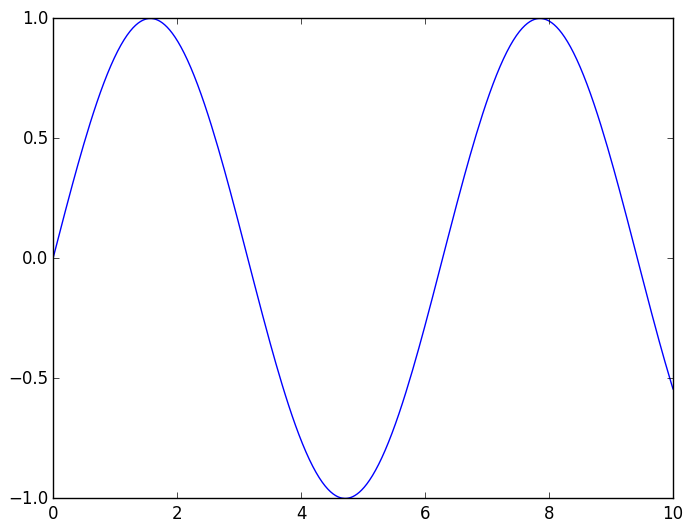

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5a77295898>

In [21]:
using ODE;
using PyPlot;

function F(t, y)
    return [y[2], -y[1]]
end

# Nota: los valores tienen que ser reales, o da InexactError
initial = [0.0, 1.0];

t_out, y_out = ode23(F, initial, [0, 10])

ys = [y_out[i][1] for i in 1:length(y_out)];
plot(t_out, ys)

[5] Entrega tu propuesta de proyecto final, teniendo en cuenta los lineamientos en el archivo `Proyectos finales.ipynb` en el respositorio del curso.

Ya lo envié por correo. Aquí viene la copia:

¡Buenas tardes!

Les quisiéramos avisar que ya escogimos nuestro tema de proyecto final. 

Lo que vamos a hacer son simulaciones de plasmas con Particle-In-Cell. Como mínimo, vamos a hacer y presentar una simulación electrostática en 1D para mostrar la aparición de ondas de plasma. Veremos si avanzamos más que esto.

¡Saludos!
Iván y Carlos.